In [2]:
import pandas as pd

In [7]:
df = pd.read_excel('customerfeedback.xlsx')
df.head()

,Customer ID,Tenure,Geography ID,Completed tutorial,Subscription ID,Role,Company ID,Rating,Theme,Original Score
0,10000000,7.0,2,yes,2,1,2,High,speed,9
1,10000001,9.0,1,yes,2,1,1,High,features,10
2,10000002,7.0,1,yes,1,1,2,High,design,9
3,10000003,24.0,4,yes,2,1,2,High,price,10
4,10000004,6.0,4,no,2,1,1,High,governance,9


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45218 entries, 0 to 45217
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         45218 non-null  int64  
 1   Tenure              44406 non-null  float64
 2   Geography ID        45218 non-null  int64  
 3   Completed tutorial  45218 non-null  object 
 4   Subscription ID     45218 non-null  int64  
 5   Role                45218 non-null  int64  
 6   Company ID          45218 non-null  int64  
 7   Rating              45218 non-null  object 
 8   Theme               45218 non-null  object 
 9   Original Score      45218 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 3.4+ MB


,Customer ID,Tenure,Geography ID,Subscription ID,Role,Company ID,Original Score
count,4.521800e+04,44406.000000,45218.00000,45218.000000,45218.000000,45218.000000,45218.000000
mean,1.002261e+07,16.710827,1.72051,1.839776,1.776328,1.832323,7.419457
std,1.305346e+04,11.702538,0.86660,0.366818,0.549711,0.608247,2.137732
min,1.000000e+07,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
25%,1.001130e+07,8.000000,1.00000,2.000000,1.000000,1.000000,6.000000
50%,1.002261e+07,16.000000,1.00000,2.000000,2.000000,2.000000,8.000000
75%,1.003391e+07,24.000000,2.00000,2.000000,2.000000,2.000000,9.000000
max,1.004522e+07,60.000000,4.00000,2.000000,3.000000,3.000000,10.000000


In [146]:
df.isnull().sum()

Customer ID             0
Tenure                812
Geography ID            0
Completed tutorial      0
Subscription ID         0
Role                    0
Company ID              0
Rating                  0
Theme                   0
Original Score          0
dtype: int64

#### Checking if the null values of Tenure are impacting our dataset

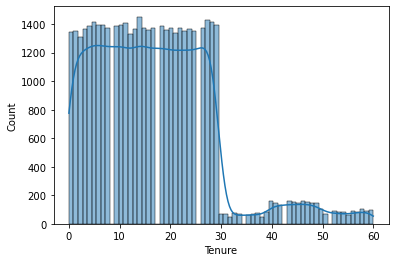

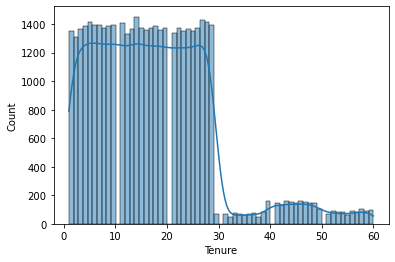

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Tenure values, including zeros
sns.histplot(df['Tenure'], kde=True)
plt.show()

# Separate plot for non-zero Tenure values
sns.histplot(df[df['Tenure'] > 0]['Tenure'], kde=True)
plt.show()

#### Since we see no particular impact of null values on our dataset that's why we keep the null values

#### Droping duplicates if any

In [54]:
df.drop_duplicates(inplace=True)

#### Statistics for Numerical Columns

In [108]:
print(' Statistics of Original Score \n', df['Original Score'].describe(),'\n')
print(' Statistics of Tenure \n', df['Tenure'].describe())

 Statistics of Original Score 
 count    43877.000000
mean         7.420259
std          2.139863
min          1.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         16.710827
Name: Original Score, dtype: float64 

 Statistics of Tenure 
 count    43877.000000
mean        17.221936
std         11.392895
min          1.000000
25%          8.000000
50%         16.000000
75%         24.000000
max         60.000000
Name: Tenure, dtype: float64


#### Statistics for Categorical Columns

In [148]:
print(' Statistics of Rating \n', df['Rating'].value_counts(),'\n')
print(' Statistics of Completed Tutorial \n', df['Completed tutorial'].value_counts(),'\n')
print(' Statistics of Geography ID \n', df['Geography ID'].value_counts(),'\n')
print(' Statistics of Theme \n', df['Theme'].value_counts())

 Statistics of Rating 
 High    39925
Low      5293
Name: Rating, dtype: int64 

 Statistics of Completed Tutorial 
 yes    25133
no     20085
Name: Completed tutorial, dtype: int64 

 Statistics of Geography ID 
 1    23206
2    13302
3     6852
4     1858
Name: Geography ID, dtype: int64 

 Statistics of Theme 
 price          9734
speed          9458
features       7599
reliability    5171
services       4154
security       2267
support        1579
design         1487
navigation     1303
other          1240
usability       938
governance      288
Name: Theme, dtype: int64


### Histograms for Numerical Data

Text(0, 0.5, 'Count')

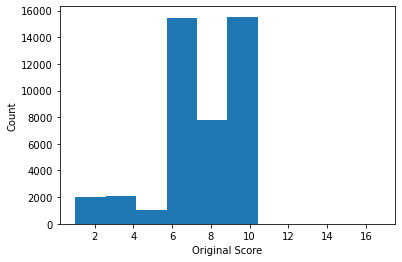

In [110]:
plt.hist(df['Original Score'])
plt.xlabel('Original Score')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

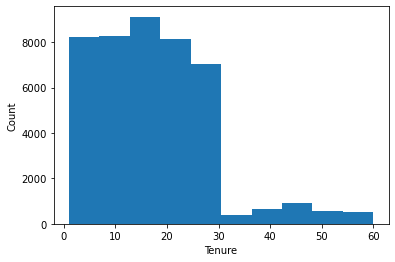

In [96]:
plt.hist(df['Tenure'])
plt.xlabel('Tenure')
plt.ylabel('Count')

### Bar plots for Categorical Data

<AxesSubplot:xlabel='Geography ID', ylabel='count'>

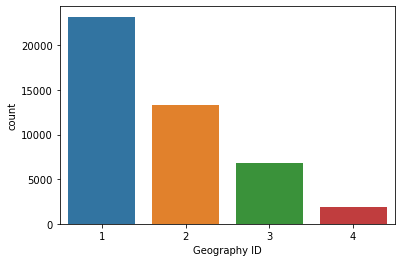

In [149]:
import seaborn as sns
sns.countplot(x='Geography ID',data=df)

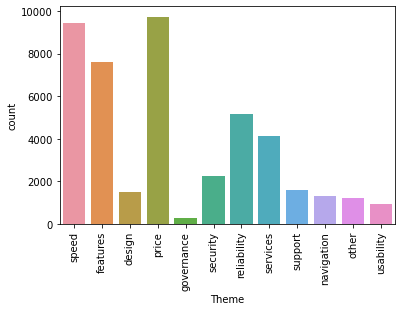

In [150]:
sns.countplot(x='Theme',data=df)
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='Rating', ylabel='count'>

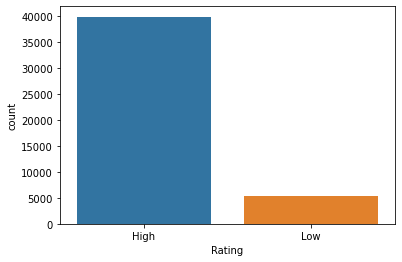

In [151]:
sns.countplot(x='Rating',data=df)

<AxesSubplot:xlabel='Completed tutorial', ylabel='count'>

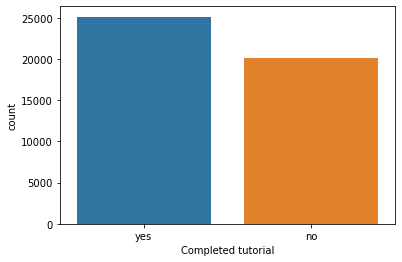

In [152]:
sns.countplot(x='Completed tutorial',data=df)

### Comparing Numerical and Categorical columns

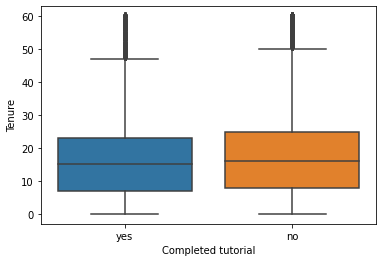

In [153]:
sns.boxplot(x='Completed tutorial', y='Tenure', data=df)
plt.show()

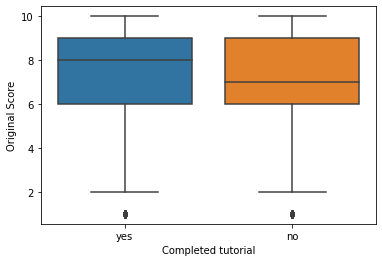

In [156]:
sns.boxplot(x='Completed tutorial', y='Original Score', data=df)
plt.show()

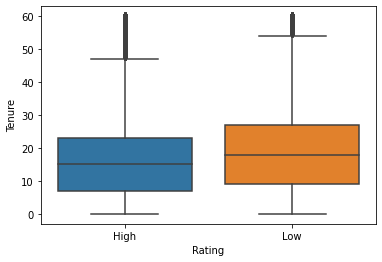

In [5]:
sns.boxplot(x='Rating', y='Tenure', data=df)
plt.show()

### Understanding how different columns interect with each other

#### Plotting bar plot to check if completing tutorial has any impact on rating and original score

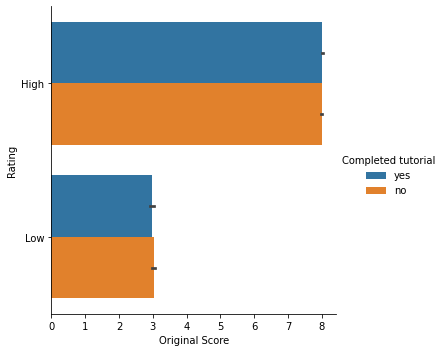

In [10]:
sns.catplot(x='Original Score', y='Rating', hue='Completed tutorial', data=df, kind='bar')
plt.show()


#### Plotting bar plot to check if completing tutorial has any impact on rating and tenure

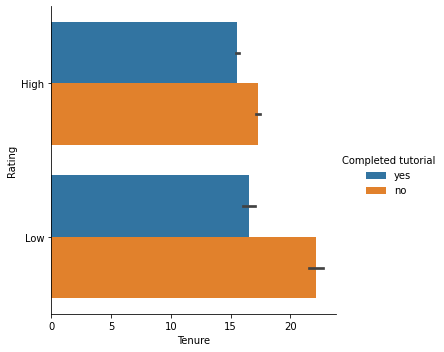

In [8]:
sns.catplot(x='Tenure', y='Rating', hue='Completed tutorial', data=df, kind='bar')
plt.show()


## Summary of the Dataset

* Most customers have a tenure of less than 30 months.
* There is a noticeable drop-off in the number of customers as tenure increases beyond 30 months.
* Average Tenure is 17
* Analyzing the data reveals that tenure does not have a significant impact on the ratings.
* Customers who have completed tutorials tend to give higher ratings, suggesting the tutorials are beneficial.
* Identifying themes helps in understanding key areas of concern or satisfaction for customers.
* Most customers use the service because of its Price, Speed and Features
* Average Original Score is 7.420259
* Mostly users are from Geography ID 1
* Higher Original Scores are associated with higher Ratings.
* Customers who completed the tutorial tend to have higher ratings across all Original Score categories